In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
green = {
    "voltage": [393,252,123,0,-52,-95,-147,-212,-312,-406,-511,-620],
    "current": [2958,2272,1636,1034,810,640,471,298,127,47,12,0]
}
lambda_green = 532

red = {
    "voltage": [390,278,152,0,-22,-54,-72,-104,-135,-192,-292],
    "current": [495,365,213,61,47,30,20,10,9,7,0]
}
lambda_red = 634.6

violet = {
    "voltage": [420,290,136,0,-74,-116,-179,-380,-630,-877,-1060,-1180],
    "current": [3859,3249,2530,1891,1578,1420,1203,680,282,72,10,0]
}
lambda_violet = 405
df_red = pd.DataFrame(red)
df_green = pd.DataFrame(green)
df_violet = pd.DataFrame(violet)

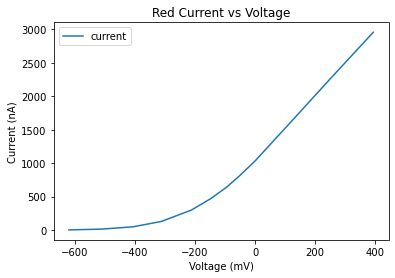

In [24]:
df_green.plot(x="voltage", y="current")
plt.title("Red Current vs Voltage")
plt.xlabel("Voltage (mV)")
plt.ylabel("Current (nA)");